In [177]:
%matplotlib inline
import sys
import time
import pickle
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import re

In [138]:
# Load dataframe with  the full scrape 1990-2018
df_all = pickle.load(open("/Users/elenabg/df_all.p", "rb")) 
df_all.columns=['Description', 'Date', 'Location', 'Victim', 'Alleged_Responsible', 'Type']

In [139]:
df_all.shape # dimensions of original dataframe: 43,274 obs on 6 var

(43274, 6)

In [140]:
df_all.head(10) # first ten observations

,Description,Date,Location,Victim,Alleged_Responsible,Type
0,Pescadores asesinados por efectivos de la Arma...,1990-01-10,BOLÍVAR / SAN PABLO,"LÓPEZ CAMARGO ARCENIA B40, PADILLA OSPINA UDYS...",EJERCITO,B:1:40 PERSECUCIÓN POLÍTICA:ASESINATO
1,Campesinos algunos de ellos simpatizantes del ...,1990-01-14,ANTIOQUIA / TURBO,"ROMERO FERMIN A11, URSOLA LUCIO MIGUEL A11, UR...",PARAMILITARES,A:1:11 PERSECUCIÓN POLÍTICA:DESAPARICIÓN FORZADA
2,Miembros del DAS y del Ejército Nacional ejecu...,1990-01-17,SANTANDER / PIEDECUESTA,"JOSE MIGUEL CALDERON (1952) A10, A10, D701, D...","DAS, EJERCITO",A:1:10 PERSECUCIÓN POLÍTICA:EJECUCIÓN EXTRAJUD...
3,Labriegos asesinados por siete desconocidos qu...,1990-01-18,CUNDINAMARCA / LA PALMA,"CRUZ MARIA D701, PEREZ VICTOR HUGO D701, SANCH...",FARC-EP,D:1:701 PERSONAS:HOMICIDIO INTENCIONAL DE PERS...
4,Campesinos que cuidaban la finca Villa Angélic...,1990-01-20,ANTIOQUIA / GÓMEZ PLATA,"DEL S. MARTÍNEZ NUBIA B40, MARTÍNEZ M. EGIDIO ...",SIN INFORMACIÓN,B:1:40 PERSECUCIÓN POLÍTICA:ASESINATO
5,Campesinos asesinados por unos 18 hombres arma...,1990-01-23,MAGDALENA / TENERIFE,"OSORIO P. ANA RAQUEL D701, RODRIGUEZ O. RODOLF...",ELN,D:1:701 PERSONAS:HOMICIDIO INTENCIONAL DE PERS...
6,Campesina asesinada en hecho ocurrido en el co...,1990-02-01,BOLÍVAR / MARÍA LA BAJA / RETIRO NUEVO,CUELLO TORRES DORIS D701 | Víctimas Ind:1,EPL,D:1:701 PERSONAS:HOMICIDIO INTENCIONAL DE PERS...
7,"El 4 de febrero de 1990, paramilitares tortura...",1990-02-04,META / SAN JUAN DE ARAMA,"LOPEZ DE MUÑOZ MARIA DIOMEDES D72, A10, D701, ...",PARAMILITARES,A:1:10 PERSECUCIÓN POLÍTICA:EJECUCIÓN EXTRAJUD...
8,Campesinos asesinados en masacre perpetuada po...,1990-02-23,META / EL CASTILLO,"ROA JACINTO A10, D701, BERNARDINO A10, D701, ...",PARAMILITARES,A:1:10 PERSECUCIÓN POLÍTICA:EJECUCIÓN EXTRAJUD...
9,Campesinos asesinados por un grupo de sujetos ...,1990-02-24,CÓRDOBA / LOS CÓRDOBAS / MORINDÓ SANTANA,"ESTRELLA MORENO RUBÉN B40, SALVADOR LEÓN G. MA...",SIN INFORMACIÓN,B:1:40 PERSECUCIÓN POLÍTICA:ASESINATO


In [163]:
# Without duplicates
df = df_all.drop_duplicates(subset= 'Victim', keep='first', inplace = False)

In [164]:
# Remove trailing letters/colons from 'Type'
regex_pat = re.compile(r'\w:\d+:\d+', flags=re.IGNORECASE)
df['Type'] = df.Type.str.replace(regex_pat, '')
df.shape # dimensions of clean dataframe: 36,131 obs on 6 var (disregard warning)

/Users/elenabg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(36131, 6)

In [176]:
df['Date'] = pd.to_datetime(df['Date'])

In [178]:
df['mnth_yr'] = df['Date'].apply(lambda x: x.strftime('%B-%Y')) # add month-year col
df['month'] = df['Date'].apply(lambda x: x.strftime('%B')) # add month col
df['year'] = pd.DatetimeIndex(df['Date']).year # add year col
df = df.sort_values(by='Date') # sort by date
df.head(5) # extended dataframe (five first obs)

,Description,Date,Location,Victim,Alleged_Responsible,Type,mnth_yr,month,year
39,Hacendado asesinado a bala por un grupo de ind...,1990-01-01,NORTE DE SANTANDER / TOLEDO,MOGOLLÓN V. JOSE D701 | Víctimas Ind:1,ELN,PERSONAS:HOMICIDIO INTENCIONAL DE PERSONA PRO...,January-1990,January,1990
40,Campesino desaparecido desde el bombardeo de 5...,1990-01-06,ANTIOQUIA / YONDÓ,GUERRA CATALINO B48 | Víctimas Ind:1,SIN INFORMACIÓN,PERSECUCIÓN POLÍTICA:RAPTO,January-1990,January,1990
41,Campesinos asesinados por un grupo de individu...,1990-01-07,ANTIOQUIA / NECOCLÍ / PUEBLO NUEVO,"GALVAN J. DOMINGO JOSE D701, DÍAZ O. JUAN BAUT...",EPL,PERSONAS:HOMICIDIO INTENCIONAL DE PERSONA PRO...,January-1990,January,1990
42,Campesinos asesinados por un grupo de armados ...,1990-01-08,RISARALDA / PUEBLO RICO,"VALENCIA V. WILLIAM D701, GRANADA M. CAMPO ELI...",EPL,PERSONAS:HOMICIDIO INTENCIONAL DE PERSONA PRO...,January-1990,January,1990
43,Pescador capturado por efectivos de la armada ...,1990-01-10,BOLÍVAR / SAN PABLO,"ORDUZ LIBARDO D72, A10, D701, A12 | Víctimas I...",EJERCITO,"PERSECUCIÓN POLÍTICA:EJECUCIÓN EXTRAJUDICIAL,...",January-1990,January,1990


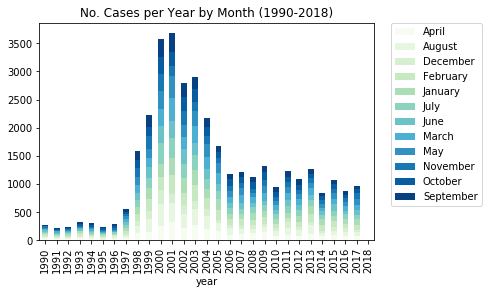

In [169]:
#### EXPLORATORY ANALYSIS:
### No. Cases

## 1. By Month
colors = plt.cm.GnBu(np.linspace(0, 1, 12))
df_gmth = pd.DataFrame({'Count' : df.groupby(['year', 'month']).size()}).reset_index()
df_gmth = df_gmth[df_gmth.Count >=0]
df_gmth_piv = df_gmth.pivot(index='year', columns='month', values='Count')
df_gmth_piv.plot(kind='bar', stacked=True, color = colors)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("No. Cases per Year by Month (1990-2018)")

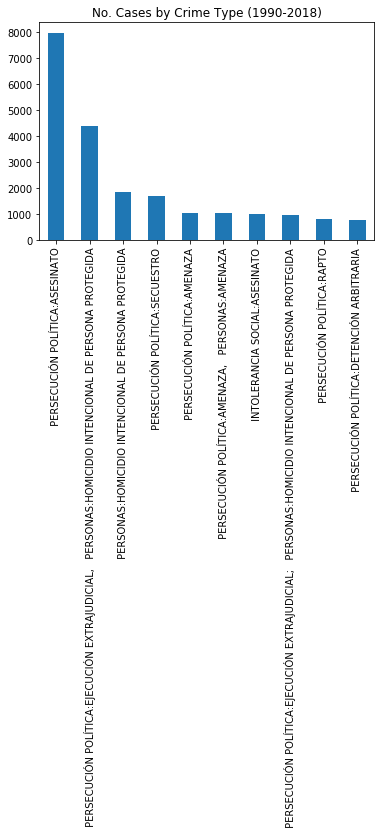

In [170]:
## 2. By Crime Type:
 # 2.a Total
df_by_type = df['Type'].value_counts() 
top10_type = df_by_type[:10]
top10_type.plot(kind = 'bar')
plt.title("No. Cases by Crime Type (1990-2018)")

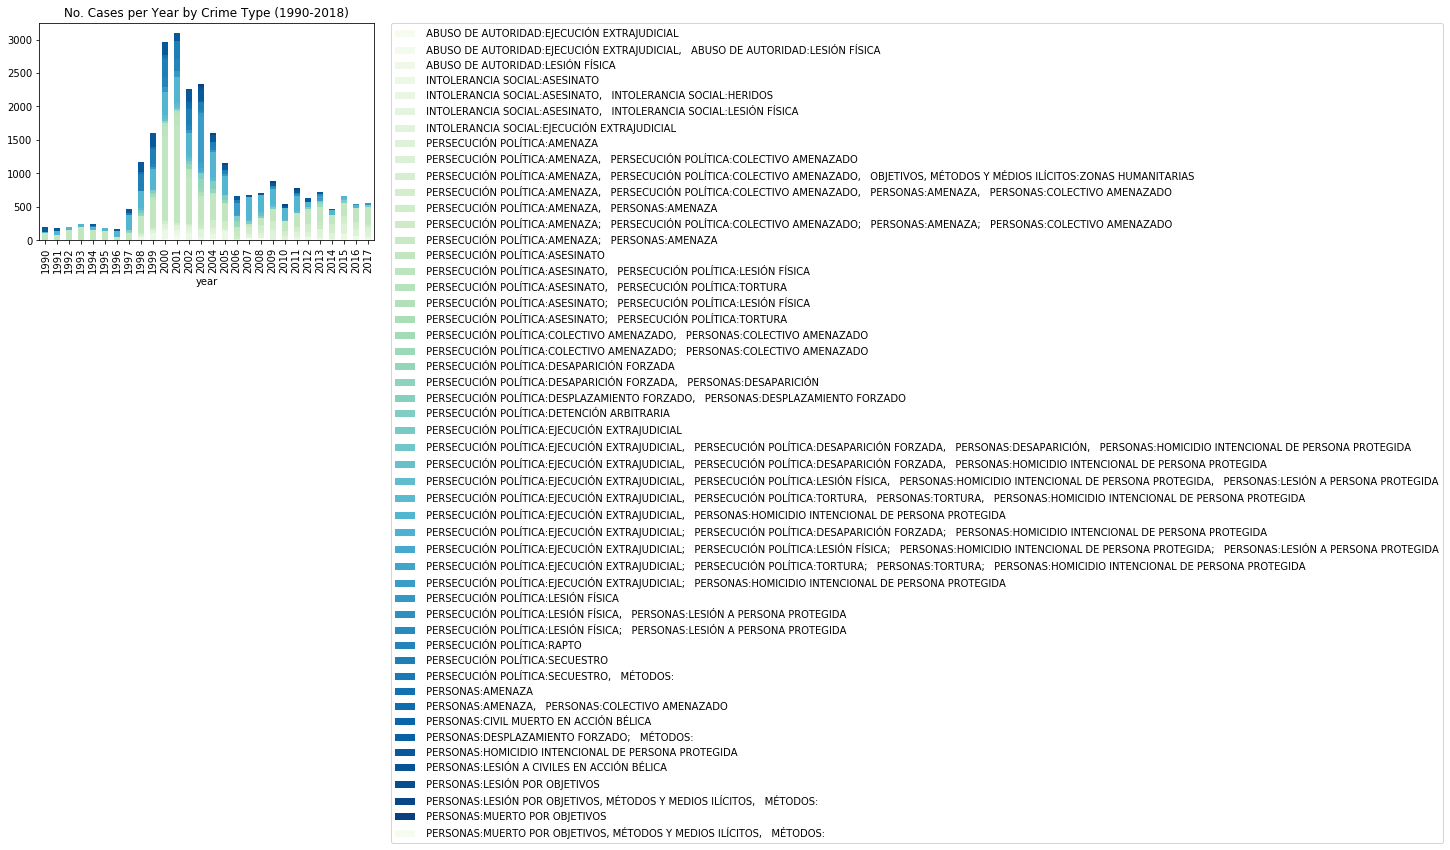

In [171]:
# 2.b Per Year
colors = plt.cm.GnBu(np.linspace(0, 1, 50))
df_gtp = pd.DataFrame({'Count' : df.groupby(['year', 'Type']).size()}).reset_index()
df_gtp = df_gtp[df_gtp.Count >=20]
df_gtp_piv = df_gtp.pivot(index='year', columns='Type', values='Count')
df_gtp_piv.plot(kind='bar', stacked=True, color = colors)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("No. Cases per Year by Crime Type (1990-2018)")

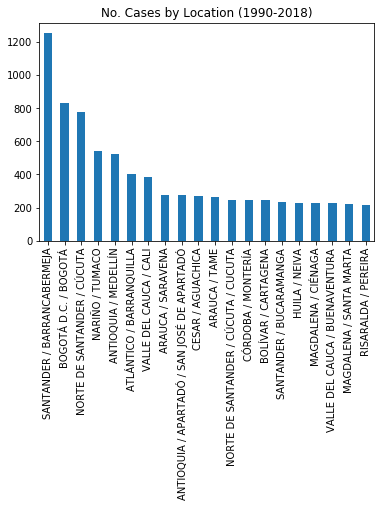

In [172]:
## 3. By Location:
 # 3.a Total
df_by_loc = df['Location'].value_counts() 
df_by_loc.sort_values(ascending=False)
top10_loc = df_by_loc[:20]
top10_loc.plot(kind = 'bar')
plt.title("No. Cases by Location (1990-2018)")

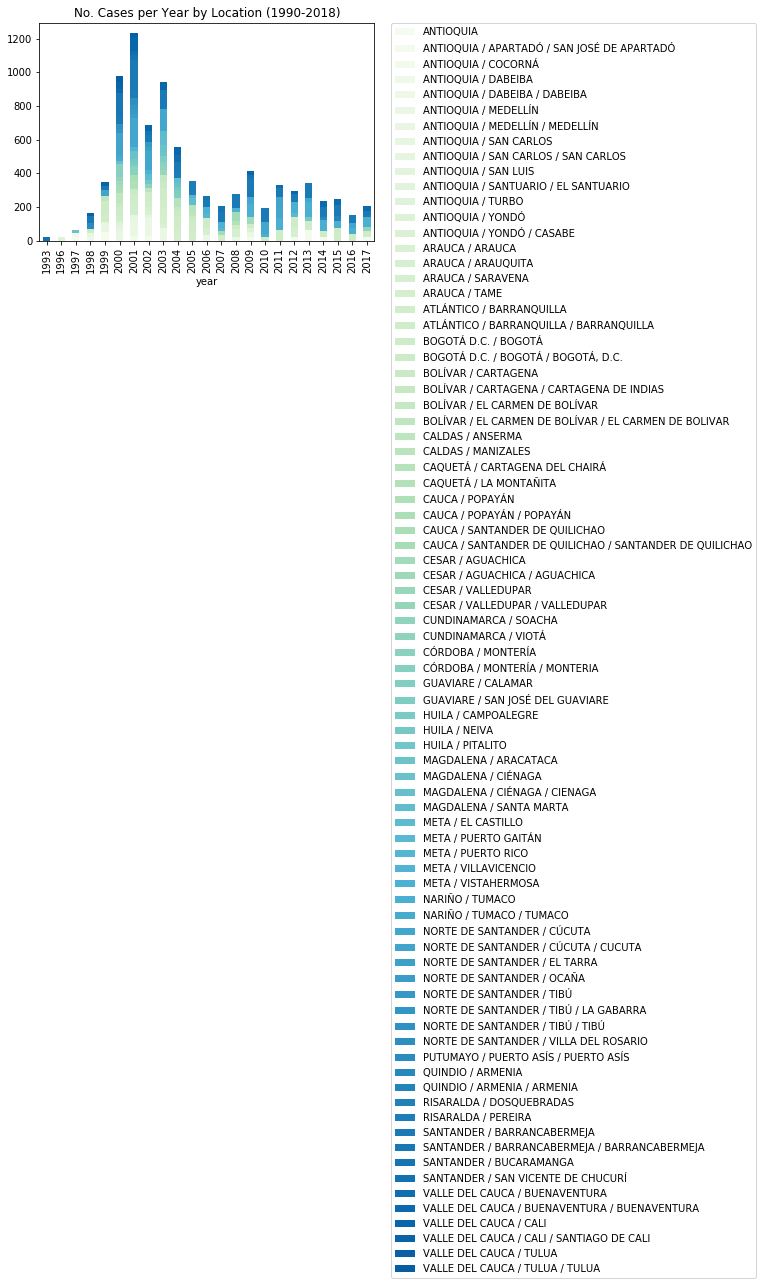

In [173]:
# 3.b Per Year
colors = plt.cm.GnBu(np.linspace(0, 1, 90))
df_locy = pd.DataFrame({'Count' : df.groupby(['year', 'Location']).size()}).reset_index()
df_locy = df_locy[df_locy.Count >=20]
df_locy_piv = df_locy.pivot(index='year', columns='Location', values='Count')
df_locy_piv.plot(kind='bar', stacked=True, color=colors)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("No. Cases per Year by Location (1990-2018)")

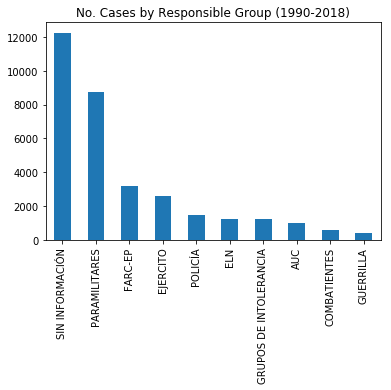

In [174]:
## 4. By Responsible Group:
 # 4.a Total
df_by_resp = df['Alleged_Responsible'].value_counts() 
df_by_resp.sort_values(ascending=False)
top10_resp = df_by_resp[:10]
top10_resp.plot(kind = 'bar')
plt.title("No. Cases by Responsible Group (1990-2018)")

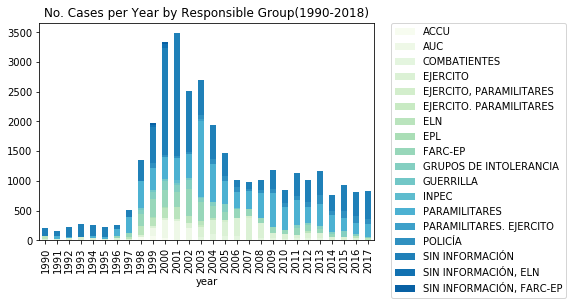

In [179]:
# 4.b Per Year
colors = plt.cm.GnBu(np.linspace(0, 1, 20))
df_gy = pd.DataFrame({'Count' : df.groupby(['year', 'Alleged_Responsible']).size()}).reset_index()
df_gy = df_gy[df_gy.Count >=25]
df_gy_piv = df_gy.pivot(index='year', columns='Alleged_Responsible', values='Count')
df_gy_piv.plot(kind='bar', stacked=True, color=colors)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("No. Cases per Year by Responsible Group(1990-2018)")